<a href="https://colab.research.google.com/github/likitha888/python/blob/main/Mini_Project%20Credit%20Card%20Fraud%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/credit_card_fraud_dataset.csv')
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [ ]:
df.shape

(100000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


<Axes: >

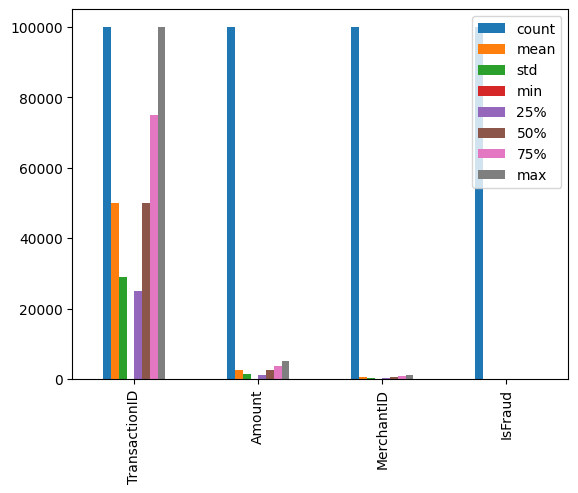

In [ ]:
df.describe().T.plot(kind='bar')

In [ ]:
df.columns.tolist()

['TransactionID',
 'TransactionDate',
 'Amount',
 'MerchantID',
 'TransactionType',
 'Location',
 'IsFraud']

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split # Import the train_test_split function
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

features=['Amount','MerchantID','TransactionType','Location']
target='IsFraud'
X=df[features]
y=df[target]
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)
transformer = ColumnTransformer(
    [
       ("encoder",OneHotEncoder(),['TransactionType','Location'])
    ]
)
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)
models ={"randomForest":RandomForestClassifier(),
        "DecisionTree":DecisionTreeClassifier(),
        "XGBClassifier":XGBClassifier(),
        "LogisticRegression":LogisticRegression()
        }
accuracies=[]
for name,model in models.items():
    model.fit(X_train_transformed,Y_train)
    ypred = model.predict(X_test_transformed)
    accuracies.append({"Model":name,"Accuracy":accuracy_score(Y_test,ypred)})

accuracies
[{'Model': 'randomForest', 'Accuracy': 0.98956},
 {'Model': 'DecisionTree', 'Accuracy': 0.98956},
 {'Model': 'XGBClassifier', 'Accuracy': 0.98956},
 {'Model': 'LogisticRegression', 'Accuracy': 0.98956}]
print(classification_report(Y_test,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     24739
           1       0.00      0.00      0.00       261

    accuracy                           0.99     25000
   macro avg       0.49      0.50      0.50     25000
weighted avg       0.98      0.99      0.98     25000



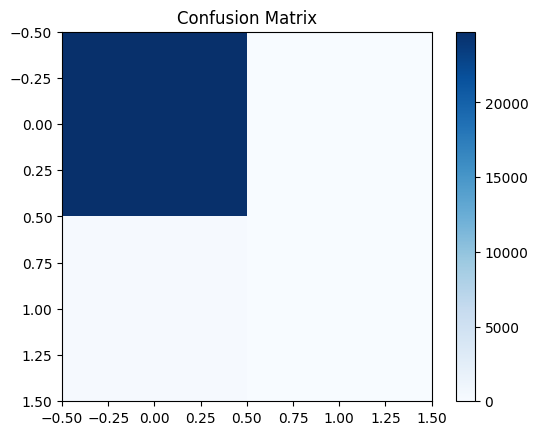

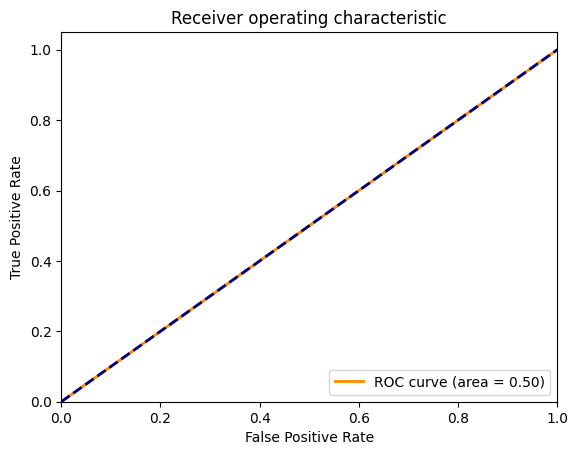

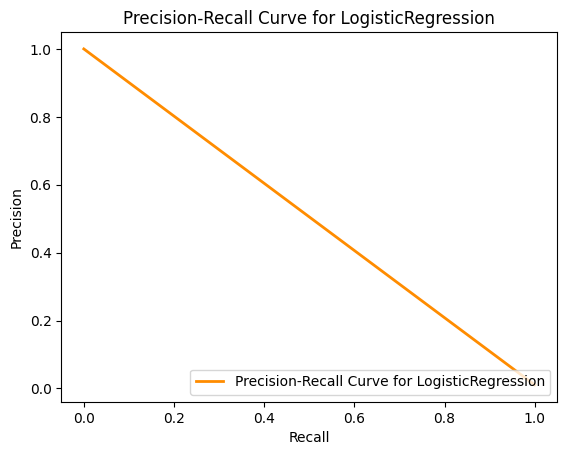

In [ ]:
# ROC-AUC Curve
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve # Import roc_curve
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(Y_test, ypred)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

fpr, tpr, thresholds = roc_curve(Y_test, ypred)
auc = roc_auc_score(Y_test, ypred)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, ypred)  # Fixed indentation
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall Curve for {name}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for {name}')
plt.legend(loc="lower right")
plt.show()